In [1]:
%cd ../
%matplotlib inline

/home/work/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
mini_pieman = niidb.FMriActivationsDb('data/mini_pieman.db',
                                     mask='data/pieman_data/wholebrain.nii.gz')

In [5]:
dtfa = DTFA.DeepTFA(mini_pieman.all(), mask='data/pieman_data/wholebrain.nii.gz', num_factors=100, embedding_dim=2)

11/11/2018 15:05:07 Loading Nifti image data/pieman_data/sub-001-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False, smooth=None)
11/11/2018 15:05:09 Loading Nifti image data/pieman_data/sub-003-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False, smooth=None)
11/11/2018 15:05:12 Loading Nifti image data/pieman_data/sub-002-task-intact1.nii with mask data/pieman_data/wholebrain.nii.gz (zscore=False, smooth=None)


In [6]:
dtfa.normalize_activations()

[tensor(10.8725), tensor(9.7904), tensor(8.5388)]

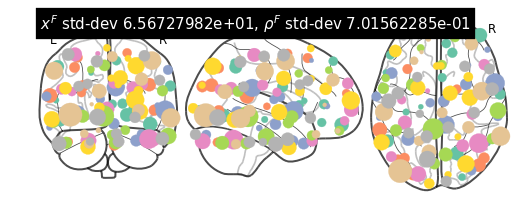

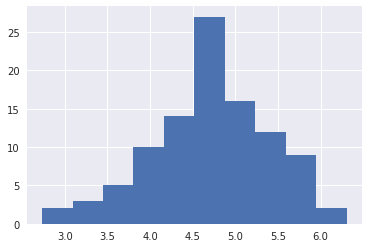

(<nilearn.plotting.displays.OrthoProjector at 0x7f4eb1c4ff60>,
 tensor([[-53.2695, -55.1110,  45.2555],
         [  4.2606,  11.7070,   5.7743],
         [-33.7464, -24.6621,  -9.8305],
         [ 19.5367, -68.0806,  -5.6260],
         [ 51.6015, -56.6657,  50.2220],
         [-55.0316,  16.9896,   9.8061],
         [ 44.0521,  56.2870, -15.3248],
         [-50.1981,  35.3653, -13.0323],
         [ 25.2428, -93.0276,   1.5364],
         [ 65.2033,  -5.7937,  24.7568],
         [-18.1951, -19.0789,  38.3995],
         [ 14.9630,  37.7693,   6.2400],
         [  8.6154,  47.4580,  51.4631],
         [  6.1475, -13.2214, -37.5871],
         [ 19.7848,  -0.5102,  59.6372],
         [-42.2729, -74.3192, -33.8830],
         [ 63.0858, -22.3038,   3.9703],
         [-35.5074, -73.2035,  44.3358],
         [-28.2436,  61.3050,  17.6322],
         [ 43.0271, -80.5538,  26.1881],
         [-61.4301, -43.2815,  14.7367],
         [-26.6352, -90.3044,  24.8419],
         [ 36.9155, -25.4896, -32.2

In [7]:
dtfa.visualize_factor_embedding()

In [8]:
dtfa.average_reconstruction_error()

11/11/2018 15:07:21 Average reconstruction error (MSE): 1.13661673e+00
11/11/2018 15:07:21 Average data norm (Euclidean): 9.92958210e-01
11/11/2018 15:07:21 Percent average reconstruction error: 0.386482


(1.1366167307952326, 0.9929582103611018, 0.0038648226922840387)

In [9]:
losses = dtfa.train(num_steps=5000, learning_rate=1e-2, log_level=logging.INFO, num_particles=1,
                    batch_size=300, use_cuda=True, blocks_batch_size=8, patience=500)

11/11/2018 15:07:23 [Epoch 1] (1009ms) Posterior free-energy 1.43308528e+08 = KL from prior 3.95990601e+03 - log-likelihood -1.43304576e+08
11/11/2018 15:07:23 [Epoch 2] (919ms) Posterior free-energy 1.43644352e+08 = KL from prior 5.27150000e+03 - log-likelihood -1.43639088e+08
11/11/2018 15:07:24 [Epoch 3] (863ms) Posterior free-energy 1.43386112e+08 = KL from prior 4.30365576e+03 - log-likelihood -1.43381808e+08
11/11/2018 15:07:25 [Epoch 4] (886ms) Posterior free-energy 1.41930144e+08 = KL from prior 4.07184814e+03 - log-likelihood -1.41926080e+08
11/11/2018 15:07:26 [Epoch 5] (846ms) Posterior free-energy 1.41594624e+08 = KL from prior 1.44574570e+04 - log-likelihood -1.41580160e+08
11/11/2018 15:07:27 [Epoch 6] (850ms) Posterior free-energy 1.38911424e+08 = KL from prior 7.48867529e+03 - log-likelihood -1.38903936e+08
11/11/2018 15:07:28 [Epoch 7] (775ms) Posterior free-energy 1.41074608e+08 = KL from prior 1.07969209e+04 - log-likelihood -1.41063808e+08
11/11/2018 15:07:28 [Epoch

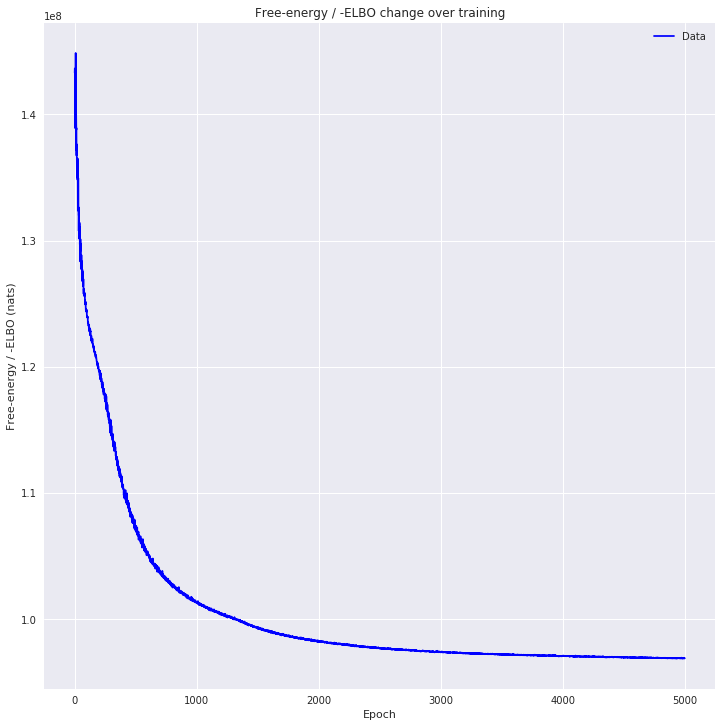

In [10]:
utils.plot_losses(losses)

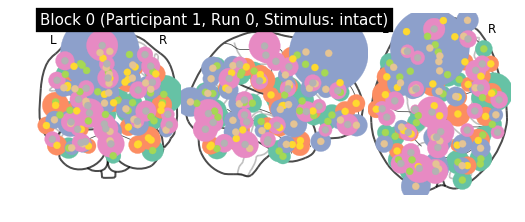

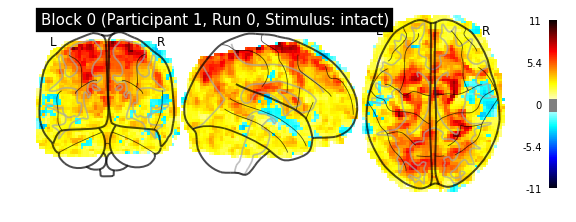

11/11/2018 16:21:28 Reconstruction Error (Frobenius Norm): 4.10646484e+03 out of 5.08479834e+03


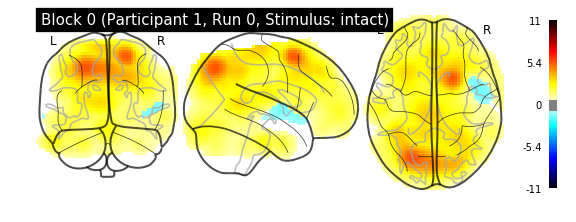

{'weights': tensor([[ 1.2696e+00,  2.8551e+00,  2.7314e-01,  ...,  1.8678e+00,
         -1.5209e+00,  2.0791e+00],
        [ 1.0323e+00,  1.1246e+00, -1.3700e+00,  ...,  9.4225e-01,
         -2.0701e+00,  1.4320e+00],
        [ 1.6811e+00,  5.3818e-01, -4.4140e-01,  ..., -2.6229e-01,
         -1.5792e+00,  4.4530e-01],
        ...,
        [-7.4546e-01, -5.8725e-01, -4.0270e-02,  ...,  7.3741e-01,
          4.0017e-01, -3.1131e-02],
        [-7.3293e-03, -8.4561e-01, -7.9419e-01,  ...,  6.4150e-01,
          2.7154e+00, -2.9005e-01],
        [ 2.6288e-01, -1.1037e+00, -1.4313e-01,  ...,  2.2351e+00,
          4.3767e+00, -2.0687e+00]]), 'factors': tensor([[ 0.0004,  0.0002,  0.0002,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

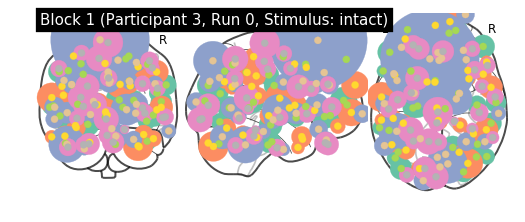

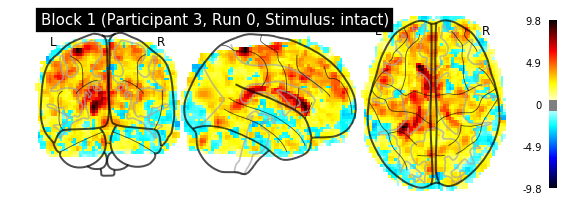

11/11/2018 16:22:01 Reconstruction Error (Frobenius Norm): 4.27144775e+03 out of 5.19534082e+03


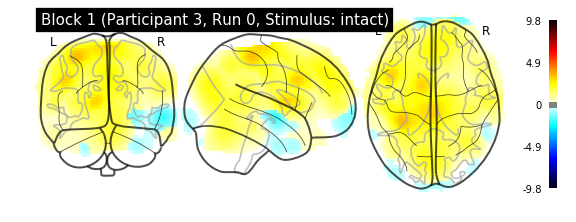

{'weights': tensor([[-1.5503e+00, -2.9686e+00, -6.6749e-01,  ...,  1.3709e+00,
          2.3714e+00, -1.5740e+00],
        [-2.7787e+00, -1.9515e+00, -4.9151e-01,  ..., -2.2490e+00,
         -1.0587e-01, -4.8784e-01],
        [-1.4971e+00, -8.0595e-02, -5.1869e-01,  ...,  1.0163e+00,
          6.7014e-01,  1.7623e-01],
        ...,
        [ 2.5093e+00,  1.5417e-01,  7.2317e-01,  ...,  1.0079e+00,
          2.4585e+00, -1.4482e+00],
        [ 2.4184e+00, -6.6789e-01,  6.2657e-01,  ..., -1.7543e+00,
          2.6079e+00, -1.8717e+00],
        [ 1.7390e+00,  1.3786e+00, -4.9323e-01,  ..., -7.3904e-01,
          3.1807e+00, -1.4988e+00]]), 'factors': tensor([[ 0.0099,  0.0050,  0.0061,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

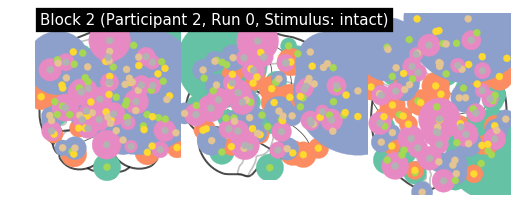

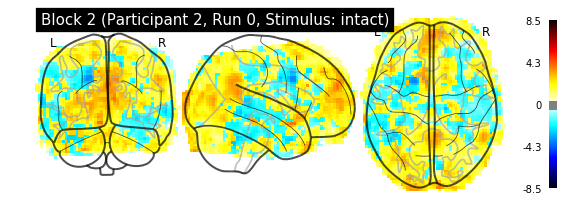

11/11/2018 16:22:34 Reconstruction Error (Frobenius Norm): 3.99492407e+03 out of 5.19533984e+03


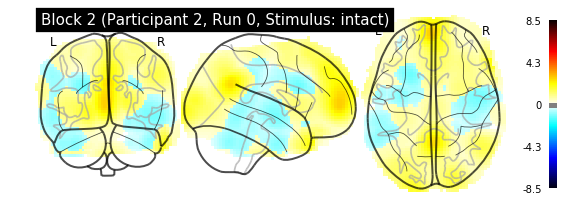

{'weights': tensor([[ 5.1294e-01,  1.6867e+00,  1.0814e-01,  ..., -7.2869e-01,
          7.3456e-01, -1.5847e+00],
        [ 6.1732e-02,  7.5066e-01, -6.6786e-01,  ...,  4.8076e-01,
          2.9975e-01, -9.4873e-01],
        [-1.3989e+00, -8.2739e-02, -4.8023e-01,  ..., -3.9398e-01,
         -9.4191e-02, -9.1148e-01],
        ...,
        [-3.1185e-01, -4.5631e-01, -9.1433e-01,  ..., -4.7188e-01,
          5.2830e-01, -9.7324e-03],
        [ 1.7549e+00, -5.7915e-01, -9.1789e-01,  ..., -1.0122e+00,
         -4.3929e-01, -1.1552e+00],
        [ 3.3420e+00, -6.4136e-01, -1.4624e+00,  ..., -1.2540e+00,
         -6.7631e-01, -1.7215e+00]]), 'factors': tensor([[ 0.0007,  0.0004,  0.0004,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000, 

In [11]:
for b in range(dtfa.num_blocks):
    dtfa.plot_factor_centers(b)
    dtfa.plot_original_brain(b)
    dtfa.plot_reconstruction(b)
    print(dtfa.results(b))

In [12]:
def task_rest_labeler(block):
    if 'rest' in block.task:
        return 'Rest'
    else:
        return 'Task'

/home/work/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


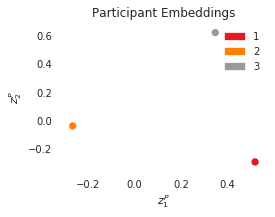

In [13]:
dtfa.scatter_subject_embedding(labeler=lambda block: block.subject)

/home/work/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


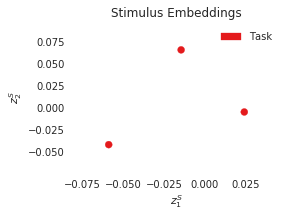

In [14]:
dtfa.scatter_task_embedding(labeler=task_rest_labeler)

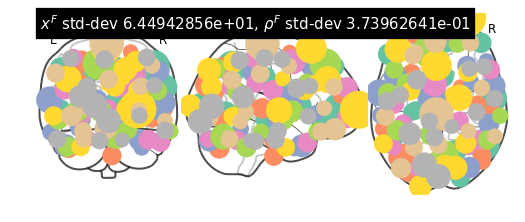

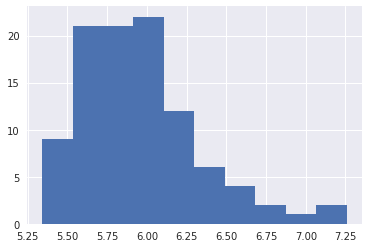

(<nilearn.plotting.displays.OrthoProjector at 0x7f4e8f5d67b8>,
 tensor([[ -50.0199,  -56.3529,   43.0922],
         [   5.1095,   12.9953,    4.8489],
         [ -27.6513,  -24.7270,  -11.0487],
         [  18.6743,  -65.3108,   -2.2797],
         [  48.2295,  -58.8859,   45.9302],
         [ -48.8382,   14.5699,    2.1256],
         [  45.3875,   48.1614,   -7.5357],
         [ -51.8659,   36.1712,   -5.9416],
         [  23.4029,  -93.5227,    7.2875],
         [  58.9407,  -10.2811,   23.6783],
         [ -23.5557,  -22.9912,   35.9930],
         [   9.2537,   50.7382,    4.6503],
         [   7.9724,   49.0454,   45.7822],
         [   3.7634,  -15.0663,  -48.4401],
         [  23.4775,    1.5654,   60.5855],
         [ -41.6715,  -72.5404,  -40.0580],
         [  57.6035,  -27.2173,    1.9465],
         [ -35.0141,  -68.7895,   45.0245],
         [ -24.6384,   56.2264,   15.7344],
         [  46.7370,  -76.4347,   18.2951],
         [ -57.8015,  -42.3069,    6.3117],
         [ -3

In [15]:
dtfa.visualize_factor_embedding()

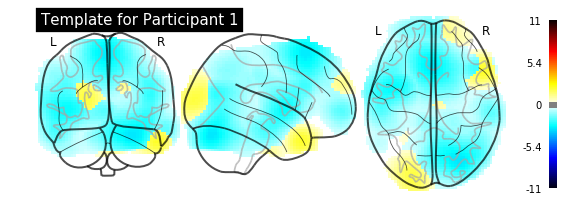

In [16]:
dtfa.plot_subject_template(1)

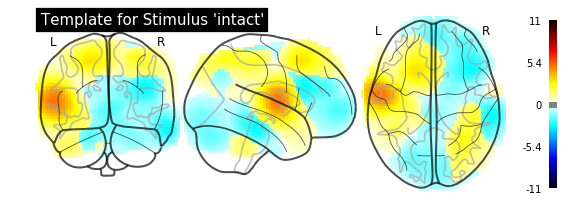

In [17]:
dtfa.plot_task_template('intact')

In [18]:
dtfa.average_reconstruction_error()

11/11/2018 16:23:08 Average reconstruction error (MSE): 7.94234885e-01
11/11/2018 16:23:08 Average data norm (Euclidean): 9.92958210e-01
11/11/2018 16:23:08 Percent average reconstruction error: 0.271511


(0.7942348854635216, 0.9929582103611018, 0.0027151110701778124)